In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
irisData = load_iris()
irisData["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
dfData = pd.DataFrame(np.c_[irisData["data"],irisData["target"]],columns = irisData["feature_names"]+["target"])
#print(dfData.tail())
dfData["target"] = dfData["target"].apply(lambda x: 1 if x == 2 else 0) 
#print(dfData.tail())

In [22]:
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[irisData["feature_names"]], dfData["target"]):
    X_train = dfData[irisData["feature_names"]].iloc[train_index]
    X_test = dfData[irisData["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [23]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
24,4.8,3.4,1.9,0.2
101,5.8,2.7,5.1,1.9
16,5.4,3.9,1.3,0.4
30,4.8,3.1,1.6,0.2
100,6.3,3.3,6.0,2.5


In [24]:
y_train[:5]

24     0
101    0
16     0
30     0
100    0
Name: target, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression
#initialize logistic regression model
logReg_clf = LogisticRegression()
#fit regression model
logReg_clf.fit(X_train, y_train)
#xCol = "sepal width (cm)"
#yCol = "petal length (cm)"
#logReg_clf.fit(X_train[[xCol,yCol]], y_train)



#predict results for X_test data
y_test_pred = logReg_clf.predict(X_test)

#y_test_pred = logReg_clf.predict(X_test[[xCol,yCol]])


/Users/maxschallwig/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
print(logReg_clf.score(X_test,y_test))
#print(logReg_clf.score(X_test[[xCol,yCol]],y_test))

0.6


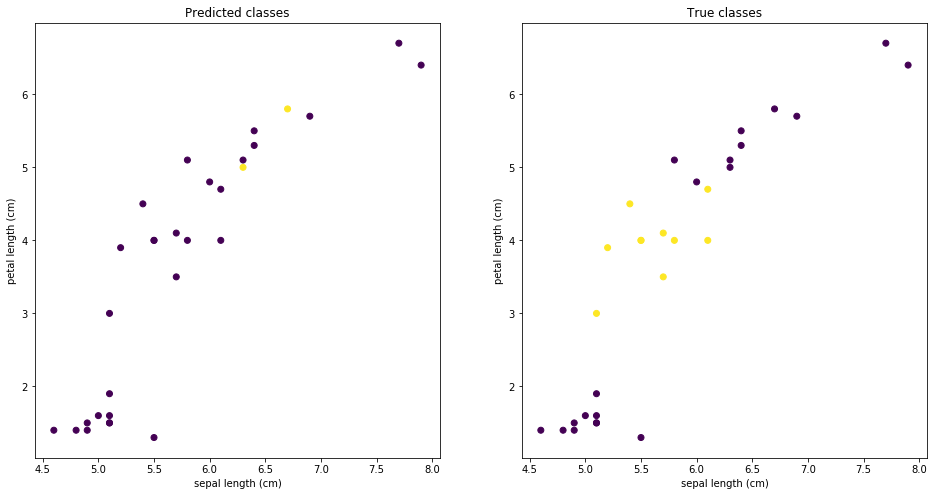

In [45]:
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
plt.title("Predicted classes")
ax.scatter(X_test["sepal length (cm)"],X_test["petal length (cm)"],c = y_test_pred)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
ax = fig.add_subplot(122)
plt.title("True classes")
ax.scatter(X_test["sepal length (cm)"],X_test["petal length (cm)"],c = y_test)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.show()

/Users/maxschallwig/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


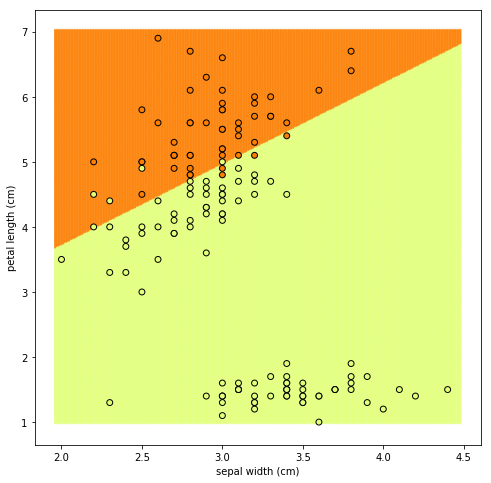

In [38]:
def make_meshgrid(x,y,sep=0.01):
    xMin = min(x) - min(x)/50
    xMax = max(x) + max(x)/50
    yMin = min(y) - min(y)/50
    yMax = max(y) + max(y)/50    
    
    return np.meshgrid(np.arange(xMin,xMax,sep),np.arange(yMin,yMax,sep))
    
dfData = pd.DataFrame(np.c_[irisData["data"],irisData["target"]],columns = irisData["feature_names"]+["target"])
dfData["target"] = dfData["target"].apply(lambda x: 1 if x == 2 else 0) 
    
fig = plt.figure(figsize=(8,8))

xCol = "sepal width (cm)"
yCol = "petal length (cm)"
logReg_clf.fit(dfData[[xCol,yCol]],dfData["target"])
y_test_pred = logReg_clf.predict(dfData[[xCol,yCol]])
xx, yy = make_meshgrid(dfData[xCol],dfData[yCol],sep=0.01)

res = logReg_clf.predict(np.c_[xx.ravel(),yy.ravel()])
plt.scatter(xx.ravel(),yy.ravel(),c=res,s=1,cmap=plt.cm.Wistia,alpha=0.5)
plt.scatter(dfData[xCol],
            dfData[yCol],
            c = dfData['target'],
            cmap=plt.cm.Wistia,
            edgecolors="black",
            s=35)
plt.xlabel(xCol)
plt.ylabel(yCol)
plt.show()

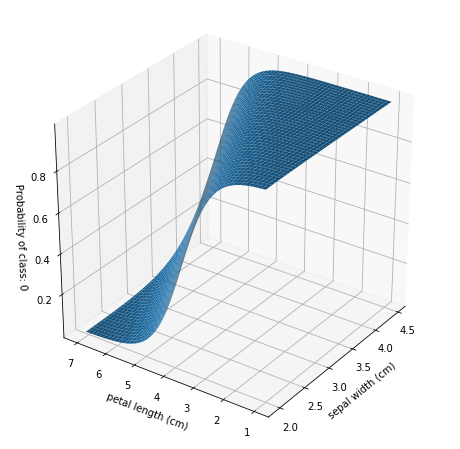

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
classNum = 0#1
ax = fig.add_subplot(111, projection='3d')
#Probabilities ordered by labels of the class(es)
Z = logReg_clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])
ax.plot_surface(xx,yy,Z[:,classNum].reshape(xx.shape[0],xx.shape[1]))
ax.set_xlabel(xCol)
ax.set_ylabel(yCol)
ax.set_zlabel("Probability of class: "+str(classNum))
ax.view_init(30, -145)
plt.show()